In [6]:
# !kaggle competitions download -c playground-series-s4e9


  0%|          | 0.00/7.84M [00:00<?, ?B/s]
 13%|█▎        | 1.00M/7.84M [00:01<00:11, 646kB/s]
 26%|██▌       | 2.00M/7.84M [00:01<00:04, 1.26MB/s]
 38%|███▊      | 3.00M/7.84M [00:02<00:02, 2.02MB/s]
 51%|█████     | 4.00M/7.84M [00:02<00:01, 2.75MB/s]
 64%|██████▍   | 5.00M/7.84M [00:02<00:00, 3.64MB/s]
 77%|███████▋  | 6.00M/7.84M [00:02<00:00, 4.11MB/s]
 89%|████████▉ | 7.00M/7.84M [00:02<00:00, 4.87MB/s]
100%|██████████| 7.84M/7.84M [00:02<00:00, 5.23MB/s]
100%|██████████| 7.84M/7.84M [00:02<00:00, 2.93MB/s]


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from analytic_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analytic_src.basic_data_inspection import DataInspector, SummaryInspectionStrategy, DataTypesInspectionStrategy
from analytic_src.univariate_analysis import UnivariateAnalysis, CatagoricalUnivariateAnalysis, NeumericalUnivariateAnalysis

pd.set_option("display.max_rows", 100)

In [2]:
train_path = "../extracted_data/train.csv"
test_path = "../extracted_data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(train_df)


Data types and Non-Null Count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


Null Count
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine      

In [4]:
data_inspector.set_strategy(SummaryInspectionStrategy())
data_inspector.execute_inspection(train_df)


Summary Statistics


                  id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.387802e+04
std     54424.933488       5.660967   49798.158076  7.881952e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47133.000000    2013.000000   24115.000000  1.700000e+04
50%     94266.000000    2017.000000   57785.000000  3.082500e+04
75%    141399.000000    2020.000000   95400.000000  4.990000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06


         brand      model fuel_type  \
count   188533     188533    183450   
unique      57       1897         7   
top       Ford  F-150 XLT  Gasoline   
freq     23088       2945    165940   

                                              engine transmission ext_col  \
count                                         188533       188533  188533   
unique                                   

Missing Values
fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

visualizing missing values


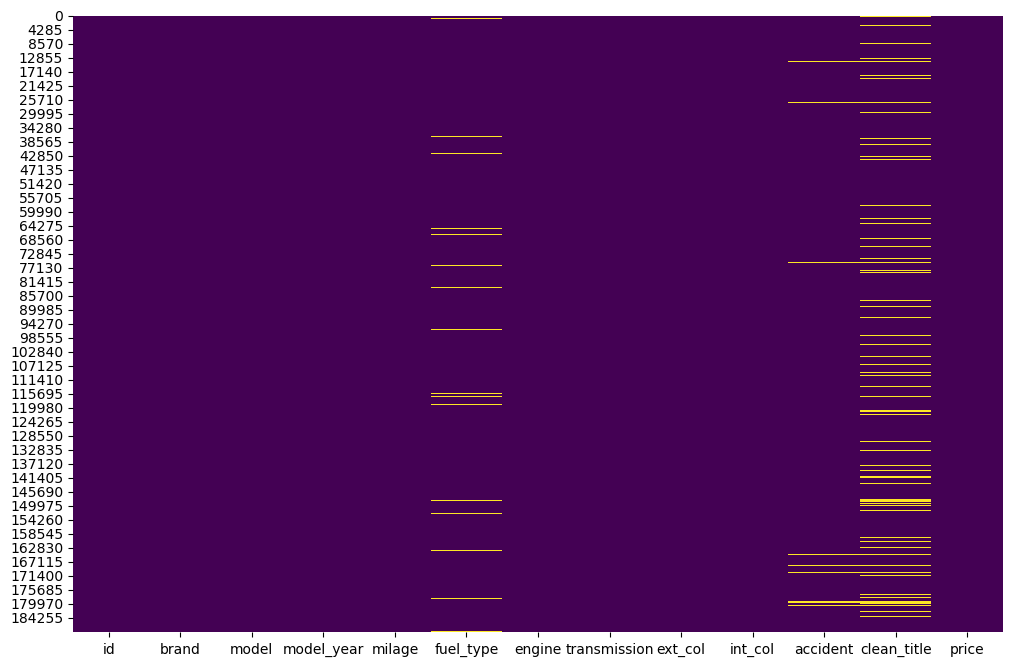

In [6]:
SimpleMissingValuesAnalysis().analysis(train_df)

In [15]:
num_cols = [col for col in train_df.columns if train_df[col].dtype != "O"]
cat_cols = [col for col in train_df.columns if col not in num_cols]

num_cols, cat_cols

(['id', 'model_year', 'milage', 'price'],
 ['brand',
  'model',
  'fuel_type',
  'engine',
  'transmission',
  'ext_col',
  'int_col',
  'accident',
  'clean_title'])

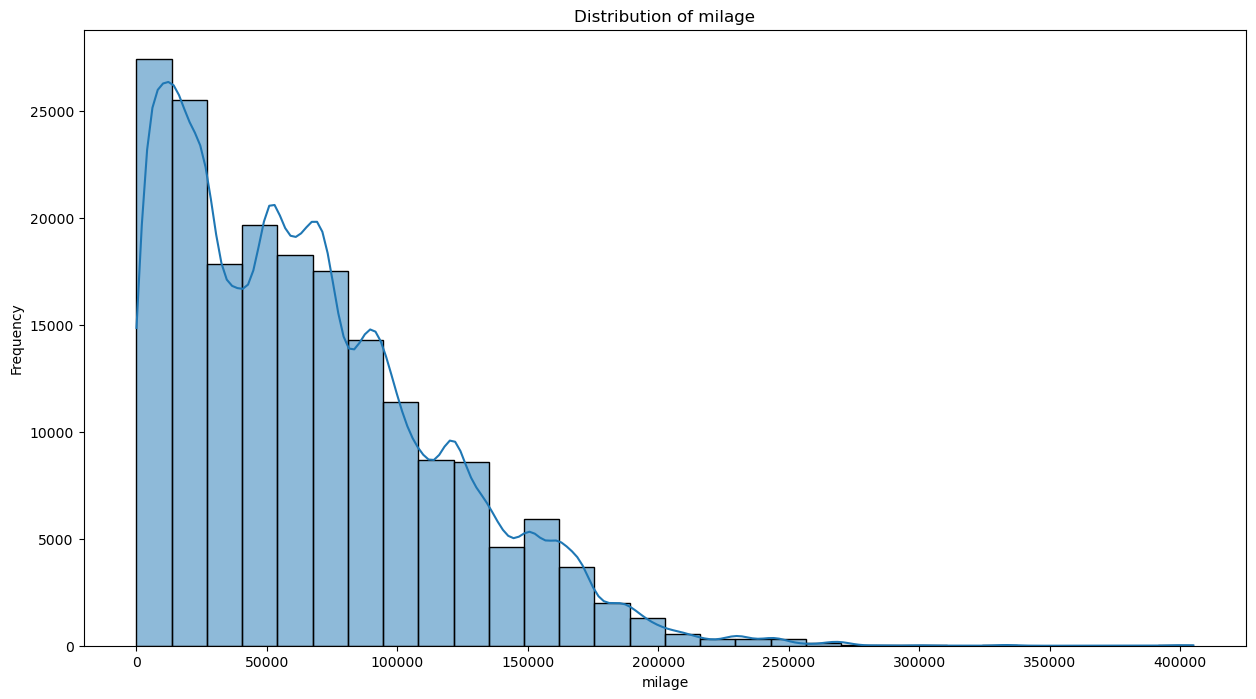

In [28]:
univariate_analyser = UnivariateAnalysis(NeumericalUnivariateAnalysis())
univariate_analyser.execute_analysis(train_df, "milage")

In [32]:
univariate_analyser.set_analyser(NeumericalUnivariateAnalysis(bins=10))
univariate_analyser.execute_analysis(train_df, "price")

TypeError: NeumericalUnivariateAnalysis() takes no arguments

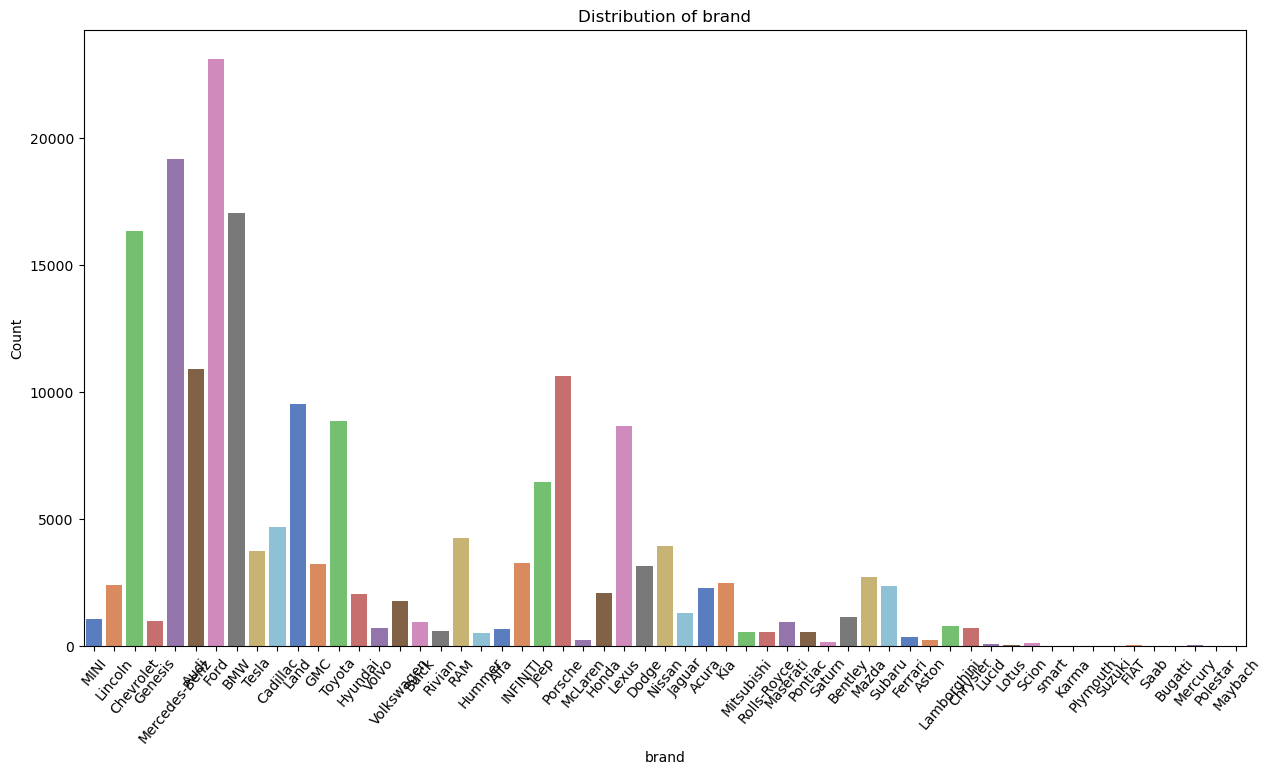

In [20]:
univariate_analyser.set_analyser(CatagoricalUnivariateAnalysis())
univariate_analyser.execute_analysis(train_df, cat_cols[0])

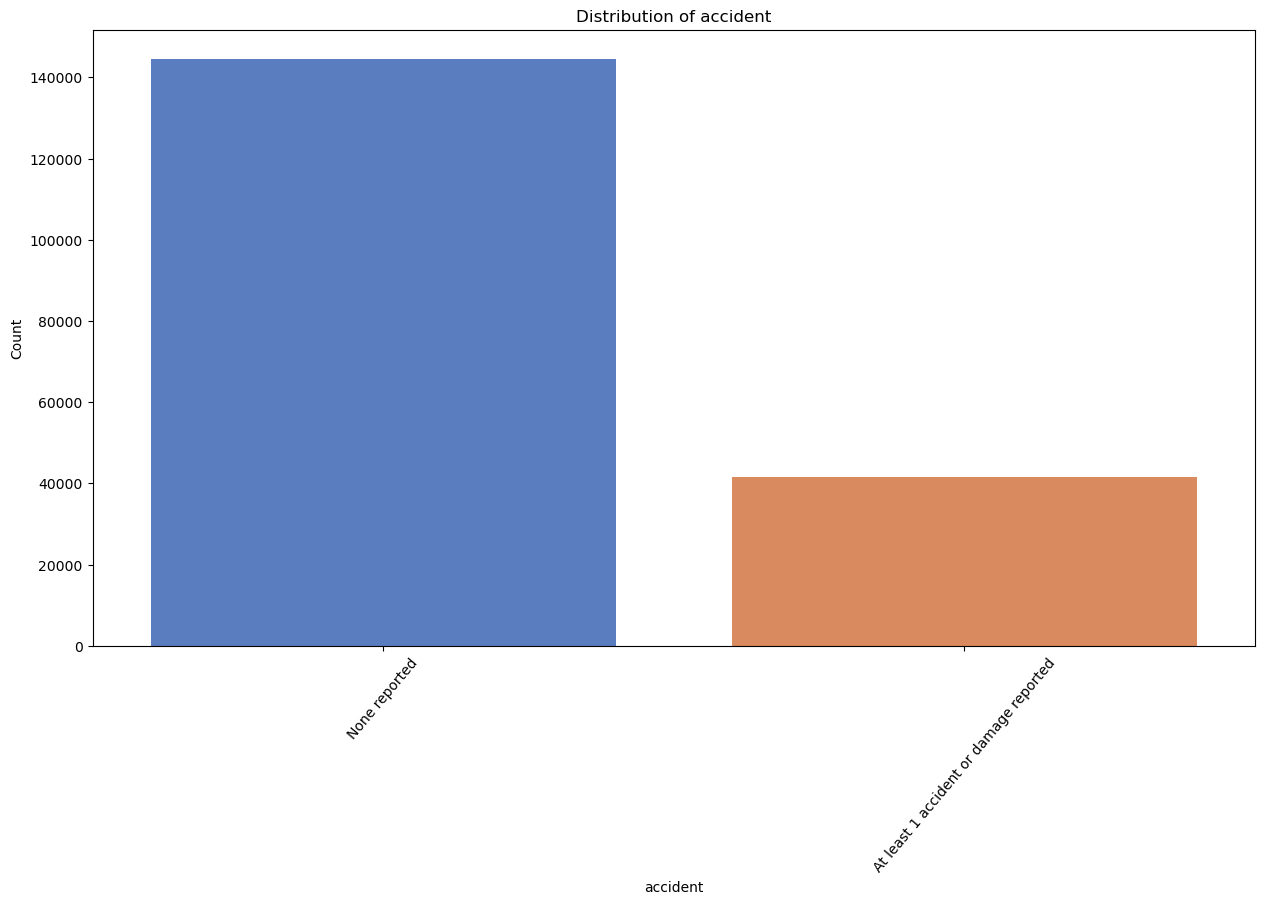

In [27]:
univariate_analyser.execute_analysis(train_df, cat_cols[7])